In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
info_csv = pd.read_csv('../data/complete_transformed_CSV.csv')

In [3]:
y = info_csv['malicious']
X = info_csv.drop('malicious', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

In [6]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
pred = knn.predict(X_test)

In [8]:
print(confusion_matrix(y_test,pred))

[[10651     2]
 [    1 10455]]


In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10653
        True       1.00      1.00      1.00     10456

    accuracy                           1.00     21109
   macro avg       1.00      1.00      1.00     21109
weighted avg       1.00      1.00      1.00     21109



In [10]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

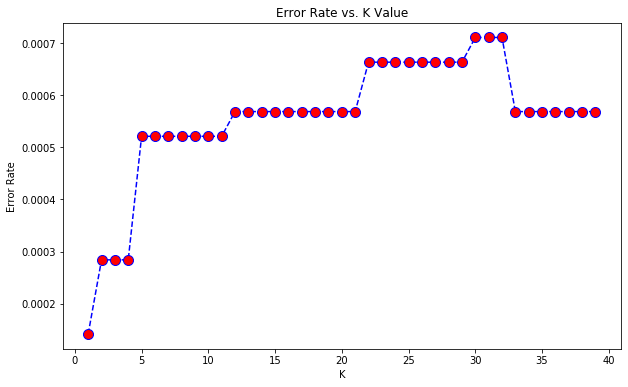

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K={}'.format(i))
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')

WITH K=1


[[10651     2]
 [    1 10455]]


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10653
        True       1.00      1.00      1.00     10456

    accuracy                           1.00     21109
   macro avg       1.00      1.00      1.00     21109
weighted avg       1.00      1.00      1.00     21109



WITH K=2


[[10651     2]
 [    4 10452]]


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10653
        True       1.00      1.00      1.00     10456

    accuracy                           1.00     21109
   macro avg       1.00      1.00      1.00     21109
weighted avg       1.00      1.00      1.00     21109



WITH K=3


[[10651     2]
 [    4 10452]]


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10653
        True       1.00      1.00      1.00     10456

    accuracy                           1.00   

In [13]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[10646     7]
 [    5 10451]]


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10653
        True       1.00      1.00      1.00     10456

    accuracy                           1.00     21109
   macro avg       1.00      1.00      1.00     21109
weighted avg       1.00      1.00      1.00     21109

